# Import Dependencies


In [3]:
import numpy as np 
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from tqdm.notebook import tqdm
#from tqdm import tqdm

# Load the data


In [25]:
# perform so basic transformations on the data
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  #how to normalize the data, (mean,std), for each channel
    ])

In [26]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 16

In [27]:
trainloader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                         shuffle=False, num_workers=2) 

In [28]:


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [29]:
images, labels = next(iter(trainloader))

In [30]:
images.shape

torch.Size([16, 3, 32, 32])

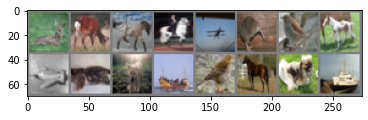

 deer  deer horse horse plane  bird  bird horse plane   cat   dog  ship  bird horse   dog  ship


In [31]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# Le Model  

In [58]:
# define the CNN architecture

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, kernel_size=3, out_channels=16, stride=1, padding=1) 
        self.conv2 = nn.Conv2d(in_channels=16, kernel_size=3, out_channels=32, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, kernel_size=3, out_channels=64, stride=1, padding=1)	
        self.conv4 = nn.Conv2d(in_channels=64, kernel_size=3, out_channels=128, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)   #max pooling
        self.fc1 = nn.Linear(in_features=8*8*128, out_features=512) #fully connected layer   # 32*32*128 --> 8*8*128 
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=10)
        self.dropout = nn.Dropout(p=0.25)
        
    def forward(self, x):
        x = F.relu(self.conv1(x)) # 32*32*16
        x= F.relu(self.conv2(x)) # 32*32*32
        x = self.pool(x) #16*16*32   #[ (N -F +2P ) / S ] +1 = 32 / 2 --> 16
        x = self.dropout(x)
        x = F.relu(self.conv3(x)) #16*16*64
        x = F.relu(self.conv4(x)) #16*16*128
        x = self.pool(x) # 8*8*128#[ (N -F +2P ) / S ] +1 = 32 / 2 --> 16
        x = self.dropout(x)
        x = x.view(-1, 8*8*128) #reshaped x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x
        

In [59]:
model = ConvNet()

In [60]:
from torch import optim
from torch import nn 


In [61]:
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train the model


In [63]:
epochs = 2

for epoch in range(epochs):
    
    model.train()
    
    loss_r = 0.0
    loss_list = []
    for i, (images, labels) in enumerate(iter(trainloader)):
        
        optimizer.zero_grad() # reset the gradients to zero
        
        output = model.forward(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step() 
        
        loss_r += loss.item()
        
        loss_list.append(loss.item())
        
    print(torch.Tensor(loss_list).mean().item())
        
        
    


KeyboardInterrupt: 

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')